# KNN - (K- Nearest Neighbor)

* K-NN is one of the simplest Machine learning Algorithms based on Supervised learning technique.


* K-NN assumes the similarity between the new case/data and available case and put the new case/data 
  into the category that is most similar to the avaliable categories.
  
  
* It stores all the avaliable data and classifies a new data point based on similarity.


* K-NN algorithm ccan be used for Regression as well as for Classification but mostly used for 
  classification problem.
  
  
* K-NN is a " non - parametric algorithm ", which means it does not make any assumption on underlying data.


* K-NN is also called a " Lazy learner algorithm " because it does not learn from the training set immediately
  instead it stores the dataset and at the time of classification, it performs an action on the dataset.
  
  
* K-NN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies 
  that data into a category that is much similar to the new data.

<img src="https://tse2.mm.bing.net/th?id=OIP.VoC6c5TDIO-qFq3-m1oc8gHaDt&pid=Api&P=0&w=347&h=173"/>

## Advantages:

- It is simple to implement.

- It is Robust to the noisy training data.

- It can be more effective if the training data is large.


## Disadvantages:

- Always needs to determine the value of k which may be complex some time.

- The computation cost is high because of calculating the distance between the data points
  for all the training samples.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      150 non-null    float64
 1   f2      150 non-null    float64
 2   f3      150 non-null    float64
 3   f4      150 non-null    float64
 4   c       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [14]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

df0.head(), df1.head(), df2.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    target flower_name  
 0       0      setosa  
 1       0      setosa  
 2       0      setosa  
 3       0      setosa  
 4       0      setosa  ,
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 50                7.0               3.2                4.7               1.4   
 51                6.4               3.2                4.5               1.5   
 52                6.9               3.1                4.9               1.5   
 53                5.5               2.3   

## Data visualization (before apply knn):

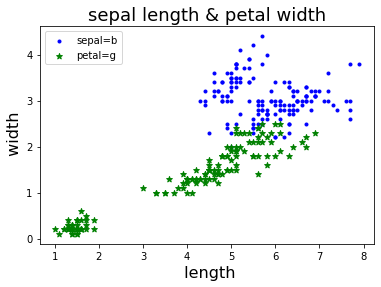

In [62]:
from matplotlib import pyplot as plt

x0 = df['sepal length (cm)'] 
y0 = df['sepal width (cm)'] 
x1 = df['petal length (cm)'] 
y1 = df['petal width (cm)'] 

plt.xlabel(' length',size=16)
plt.ylabel(' width',size=16)
plt.title('sepal length & petal width',size=18)
plt.scatter(x0, y0, color='blue', marker='.',label='sepal=b')
plt.scatter(x1, y1, color='green', marker='*',label='petal=g')
plt.legend()
plt.show()

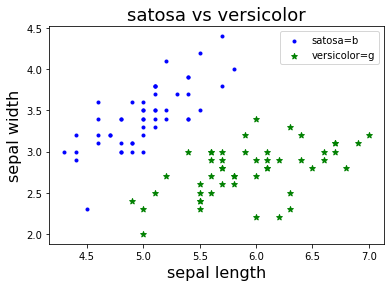

In [58]:
x0 = df0['sepal length (cm)'] 
y0 = df0['sepal width (cm)'] 
x1 = df1['sepal length (cm)'] 
y1 = df1['sepal width (cm)'] 

plt.xlabel('sepal length',size=16)
plt.ylabel('sepal width',size=16)
plt.title('satosa vs versicolor',size=18)
plt.scatter(x0, y0, color='blue', marker='.',label='satosa=b')
plt.scatter(x1, y1, color='green', marker='*',label='versicolor=g')
plt.legend()
plt.show()

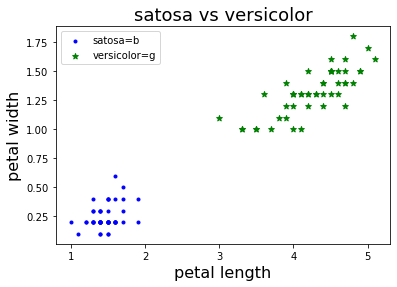

In [60]:
from matplotlib import pyplot as plt

x0 = df0['petal length (cm)'] 
y0 = df0['petal width (cm)'] 
x1 = df1['petal length (cm)'] 
y1 = df1['petal width (cm)'] 

plt.xlabel('petal length',size=16)
plt.ylabel('petal width',size=16)
plt.title('satosa vs versicolor',size=18)
plt.scatter(x0, y0, color='blue', marker='.',label='satosa=b')
plt.scatter(x1, y1, color='green', marker='*',label='versicolor=g')
plt.legend()
plt.show()

### Train & Test the data:

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
# drop the columns target and flower_name..

x = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
x_train, y_train, x_test, y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 118                7.7               2.6                6.9               2.3
 18                 5.7               3.8                1.7               0.3
 4                  5.0               3.6                1.4               0.2
 45                 4.8               3.0                1.4               0.3
 59                 5.2               2.7                3.9               1.4
 ..                 ...               ...                ...               ...
 133                6.3               2.8                5.1               1.5
 137                6.4               3.1                5.5               1.8
 72                 6.3               2.5                4.9               1.5
 140                6.7               3.1                5.6               2.4
 37                 4.9               3.6                1.4               0.1
 
 [105 rows x 4 columns],
 118    2
 18     0
 4   

In [23]:
# to know the shape of the train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## To create K-NN..

In [30]:
# to fit the data and using k = 5..

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
# to find the accuracy score of the x_test and then compare with y_test..

knn.score(x_test, y_test)

0.9777777777777777

In [32]:
# predict the data

y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [33]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

### To find the accuracy score..

In [17]:
#to find the accuracy score of y_test and then compare with y_pred..

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)              

0.9777777777777777

## Data visualization using Heatmap (after apply knn) :

Text(42.0, 0.5, 'True')

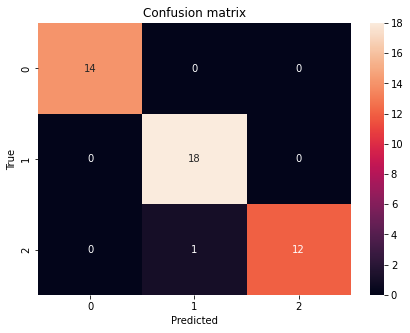

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

### Classification report..

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.95      0.97        19
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

